# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")

In [3]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Вычислим количество дубликатов:

In [5]:
df.duplicated().sum()

0

### Вывод

При чтении данных обнаружилось, что столбцы склеины, поэтому при вызове фунцкции используем параметр `sep="\t"`.  
Всего в таблице с данными содержится 23699 строк, 22 столбца. Дубликаты отсутствуют.


Типы данных в таблице: булевые - ***bool***, с плавающей точкой - ***float64***, цельночисленные - ***int64***, строковые - ***object***.  


В столбцах отсутствуют значения: *ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition*.  


### Шаг 2. Предобработка данных

Для начала проанализируем все столбцы с пропусками и там где это возможно заполним пропуски.

#### Высота потолков - ***ceiling_height***

In [6]:
df['ceiling_height'].isna().sum() #Считаем количество пропущенных значений

9195

Пропущенно 9195 значений, это серьезная доля выборки. Удалить пропуски мы не можем, т.к. это повлияет на результаты анализа. 

Учитывая отсутствие взаимосвязей высоты потолков с другими столбцами, заполним пропуски медианой.  


Медиана выбрана не случайно, т.к. она в нашем случае лучше характеризует типичные значения выборки и менее чувствительна к выбросам.  Вероятней всего, пропуски являются следствием не заполнения значения высоты потолка при подаче объявления. Думаю, сделано это умышленно, чтобы увеличить количество просмотров/покупателей.

In [7]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [8]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

#### Всего этажей в доме - ***floors_total***

In [9]:
df['floors_total'].isna().sum()

86

In [10]:
df['floors_total'] = df['floors_total'].fillna(0).astype('int')

Пропуски есть в 86 строках. Так как точно определить сколько этажей в доме невозможно, заменим пропущенные значения - **0**, чтобы объединить их в одну группу.

In [11]:
df[df['floors_total'].isna()].tail(50)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Точно назвать причину появления пропусков в значении `['floors_total']` не представляется возможным. Это могут быть как ошибки при подаче, так и ошибочные выгрузки объявлений с источников публикации.

#### Жилая площадь в квадратных метрах(м²) - ***living_area***

In [12]:
df['living_area'].isna().sum()

1903

Пропущенные знаечния есть в 1903 строках. Заменим проупски на "0".

In [13]:
df['living_area'] = df['living_area'].fillna(0)

Вычислим отношение жилой площади к общей по известным значениям и выведем среднее `ratio_living_mean`:

In [14]:
df['ratio_living'] = df['living_area'] / df['total_area']
ratio_living_mean = df['ratio_living'].mean()
ratio_living_mean

0.5194155580808664

Создадим функцию `nan_living(row)` для заполнения пропусков на основе полученного коэффициента:

In [15]:
def nan_living(row):
    if row['living_area'] == 0:
        return row['total_area'] * ratio_living_mean
    else:
        return row['living_area']

Применим метод `apply()` для заполнения отсутствующих знаечний, округим результаты до двух значков после запятой:

In [16]:
df['living_area'] = df[['living_area', 'total_area']].apply(nan_living, axis=1).round(2)
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,NaN,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14,82.59,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.000000
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,NaN,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.40,5,NaN,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.473684
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26,10.60,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.284182
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24,37.19,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0.000000
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27,15.43,26,NaN,...,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.465320
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.714754


#### Апартаменты (булев тип) - is_apartment 

In [17]:
df['is_apartment'].isna().sum()

20924

Вероятней всего, при заполнении данных значение True указывали только для категории жилья апартаменты, а False ставили, но чаще пропускали. Поэтому по умолчанию заполним пропуски значением ***False:***

In [18]:
df['is_apartment'] = df['is_apartment'].fillna(False)

#### Площадь кухни в квадратных метрах (м²) - kitchen_area

In [19]:
df['kitchen_area'].isna().sum()

2278

Отметим, что площадь кухни пропущено в квартирах со знаечнием ***True*** в колонке `[studio]`:

In [20]:
df.groupby('studio')['kitchen_area'].agg(['count', 'median'])

,count,median
studio,,
False,21421,9.1
True,0,NaN


Создадим функцию по заполнению колонки `['kitchen_area']` значением "0", если квартира является студией и внесем данные в таблицу:

In [21]:
def kitchen_area_zero(row):
    if row['studio'] == True:
        return 0
    else:
        return row['kitchen_area']

In [22]:
df['kitchen_area'] = df[['studio', 'kitchen_area']].apply(kitchen_area_zero, axis=1)

In [23]:
df['kitchen_area'].isna().sum()

2129

Остальные пропуски попробуем заменить на средние площади кухонь для групп квартир, разбитых по общей площади для восьми групп:

In [24]:
# разбиваем методом qcut общие площади на равные группы
interval_total_area = pd.qcut(df['total_area'], 8)
interval_total_area.mean

<bound method Series.mean of 0         (87.0, 900.0]
1          (40.0, 45.0]
2          (52.0, 60.0]
3         (87.0, 900.0]
4         (87.0, 900.0]
              ...      
23694     (87.0, 900.0]
23695      (52.0, 60.0]
23696      (52.0, 60.0]
23697      (69.9, 87.0]
23698    (11.999, 34.0]
Name: total_area, Length: 23699, dtype: category
Categories (8, interval[float64]): [(11.999, 34.0] < (34.0, 40.0] < (40.0, 45.0] < (45.0, 52.0] < (52.0, 60.0] < (60.0, 69.9] < (69.9, 87.0] < (87.0, 900.0]]>

In [25]:
# Добавим в таблицу столбец диапазона площади квартир
df['total_interval'] = interval_total_area

In [26]:
group_kitchen_mean = df.groupby(['total_interval'])

In [27]:
# заменим пропуски в стобце kitchen_area по среднему знаечнию площади кухонь
# cajhvbhjdfyys[ ]
df['kitchen_area'] = group_kitchen_mean['kitchen_area'].apply(lambda x: x.fillna(x.mean())).round(2)

Пропуски площадей кухонь заменили на "0" для квартир студий. В остальных случаях, средним значением площади кухни, вычисленной для 8 групп квартир, объединенных на соновании общей площади. 

Группировка квартир по общей площади позволила сузить выборку и посчитать среднее значение для площади кухонь в каждой группе. Среднее знаечение в данной переменной допустимо, т.к. разброс значений становится не таким широким, как в целом для DataFrame.  

Думаю и здесь пропуски - это результат умышленного сокрытия информации продавцами.

#### Число балконов - balcony

In [28]:
df['balcony'].isna().sum()

11519

In [29]:
df['balcony'] = df['balcony'].fillna(0).astype('int')
df['balcony'].isna().sum()

0

Количество пропущенных значений 11519.  

Скорее всего пропуски вызваны отсутствием балконов в квартире, заменим их на значение "0".

#### Название населённого пункта - locality_name

In [30]:
df['locality_name'].isna().sum()

49

In [31]:
df['locality_name'] = df['locality_name'].fillna('unknown')

Заменим пропущенные значение на 'unknown'.

#### Расстояние до ближайшего аэропорта в метрах (м) - airports_nearest

В данных расстояния до аэропорта присутствуют 5542 пропуска.

In [32]:
df['airports_nearest'].isna().sum()

5542

In [33]:
df['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Сгруппируем данные по названию населенного пункта `['locality_name']`:

In [34]:
locality_group = df.groupby(['locality_name'])

Вычислим среднее значение расстояния до аэропорта для каждой локации и заменим пропуски:

In [35]:
df['airports_nearest'] = locality_group['airports_nearest'].apply(lambda i: i.fillna(i.mean()).round(2))
df['airports_nearest'].isna().sum()

5386

В остальных случаях заменим это значение на 0. Вероятней всего это значение пропущенно из-за большого расстояния до аэропорта.

In [36]:
df['airports_nearest'] = df['airports_nearest'].fillna(0)

### По аналогии с **airports_nearest**, заполним недостающие значения в столбцах:  
- cityCenters_nearest;  

- parks_around3000;  

- parks_nearest;  

- ponds_around3000;  

- ponds_nearest.


#### Расстояние до центра города (м) - cityCenters_nearest

In [37]:
df['cityCenters_nearest'].isna().sum()

5519

In [38]:
df['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [39]:
df['cityCenters_nearest'] = locality_group['cityCenters_nearest'].apply(lambda i: i.fillna(i.mean()).round(2))
df['cityCenters_nearest'].isna().sum()

5386

In [40]:
df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(0)
df['cityCenters_nearest'].isna().sum()

0

In [41]:
zero_center = df.query('cityCenters_nearest == 0')
zero_center['locality_name'].value_counts().head(10)

посёлок Мурино             522
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    173
деревня Новое Девяткино    144
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

Расстояние до центра города не указано для небольших населенных пунктов.

#### Число парков в радиусе 3 км - parks_around3000

In [42]:
df['parks_around3000'].isna().sum()

5518

In [43]:
df['parks_around3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [44]:
df['parks_around3000'] = locality_group['parks_around3000'].apply(lambda i: i.fillna(i.mean()).round(0))
df['parks_around3000'].isna().sum()

5386

In [45]:
# Применим функцию astype, т.к. знаечние должно быть целвм числом
df['parks_around3000'] = df['parks_around3000'].fillna(0).astype('int')
df['parks_around3000'].isna().sum()

0

Т.к. значение столбце ['parks_around3000'] доступно только для числа парков в радиусе 3 км, можно предположить, что пропуски означают отсутствие парков в этой зоне. Поэтому заполнение пропущенных значений нулем имеет смысл.

#### Расстояние до ближайшего парка (м) - parks_nearest

In [46]:
df['parks_nearest'].isna().sum()

15620

In [47]:
df['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [48]:
df['parks_nearest'] = locality_group['parks_nearest'].apply(lambda i: i.fillna(i.mean()).round(2))
df['parks_nearest'].isna().sum()

5998

In [49]:
df['parks_nearest'] = df['parks_nearest'].fillna(0)
df['parks_nearest'].isna().sum()

0

Из-за большого количества пропусков для этих значений, можно с уверенностью сказать, что продавцы не знают расстояние до ближайшего парка и могут указать только их количество в пределах доступности.

#### Число водоёмов в радиусе 3 км - ponds_around3000

In [50]:
df['ponds_around3000'].isna().sum()

5518

In [51]:
df['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [52]:
df['ponds_around3000'] = locality_group['parks_nearest'].apply(lambda i: i.fillna(i.mean()).round(0))
df['ponds_around3000'].isna().sum()

0

In [53]:
df['ponds_around3000'] = df['parks_nearest'].fillna(0).astype('int')
df['ponds_around3000'].isna().sum()

0

Как и для столбца ['parks_around3000'], вероятней всего пропуски в ['ponds_around3000'], ни что иное как отсутствие водоемов в 3 км зоне.

#### Расстояние до ближайшего водоёма (м) - ponds_nearest

In [54]:
df['ponds_nearest'].isna().sum()

14589

In [55]:
df['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [56]:
df['ponds_nearest'] = locality_group['ponds_nearest'].apply(lambda i: i.fillna(i.mean()).round(2))
df['ponds_nearest'].isna().sum()

5494

In [57]:
df['ponds_nearest'] = df['ponds_nearest'].fillna(0)
df['ponds_nearest'].isna().sum()

0

#### Сколько дней было размещено объявление -  days_exposition

В колонке `['days_exposition']` отсутствуют 3181 значения, заменим эти пропуски средним значением публицации объявления.

In [58]:
df['days_exposition'].isna().sum()

3181

In [59]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [60]:
days_exposition_median = df['days_exposition'].median()
df['days_exposition'] = df['days_exposition'].fillna(days_exposition_median).astype('int')
df['days_exposition'].isna().sum()

0

Пустые ячейки в столбце ['days_exposition'], вероятно говорят нам о том, что после публикации объявление не было снято пользователем после проведения сделки или ее отмены. Объявление скорее всего было удалено администратором ресурса. 
    
Т.к. разброс значений находится в больших пределах, самым верным заполнением пропусков будет величина медианы.

Проверим присутствуют ли в таблице дубликаты:

In [61]:
print('Количество дубликатов в таблице: {}'.format(df.duplicated().sum()))

Количество дубликатов в таблице: 0


### Вывод

В таблице пропущенно достаточно большое количество значений. Причнины возникновения пропусков различны: не заполнение ряда параметров при создании объявления, предыдущая предобработка данных другим пользователем, не верная выгрузка данных с первоначальных источников и пр.  

Методы заполнения пропусков отличались для разных столбцов. Способы заполнения:
- ceiling_height, days_exposition - **медианой**,
- floors_total, balcony, airports_nearest, cityCenters_neares, parks_around3000 - значением **0**, 
- is_apartment - заполнение **булев типом**, 
- locality_name - строковым значением **'unknown'**, 
- living_area, kitchen_area, parks_nearest, ponds_around3000, ponds_nearest - **медианой для групп данных**.

### Шаг 3. Посчитайте и добавьте в таблицу

Для добавления в таблицу стоимости квадратного метра, поделим столбцы `['last_price'] / ['living_area']` и округлим значения до двух знаков после запятой.


In [62]:
df['square_meter'] = (
    (df['last_price'] / df['living_area'])
    .round(2)
)

In [63]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living,total_interval,square_meter
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,18863.0,16028.0,1,482.0,482,755.00,95,0.472222,"(87.0, 900.0]",254901.96
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11,18.60,1,False,...,12817.0,18603.0,0,0.0,0,573.22,81,0.460396,"(40.0, 45.0]",180107.53
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5,34.30,4,False,...,21741.0,13933.0,1,90.0,90,574.00,558,0.612500,"(52.0, 60.0]",151486.88
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,82.59,9,False,...,28098.0,6800.0,2,84.0,84,234.00,424,0.000000,"(87.0, 900.0]",785809.42
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,31856.0,8098.0,2,112.0,112,48.00,121,0.320000,"(87.0, 900.0]",312500.00


Добавим в таблицу временные значения день недели, месяц, год публикации объявления.  

Для этого применим метод `to_datetime` к столбцу `['first_day_exposition']`:

In [64]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d %H:%M:%S') # Зададим формат даты

In [65]:
# Вычислим день недели
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday

In [66]:
# Вычислим месяц
df['exposition_month'] = df['first_day_exposition'].dt.month

In [67]:
# Вычислим год
df['exposition_year'] = df['first_day_exposition'].dt.year
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ratio_living,total_interval,square_meter,exposition_weekday,exposition_month,exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,482,755.00,95,0.472222,"(87.0, 900.0]",254901.96,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,0.0,0,573.22,81,0.460396,"(40.0, 45.0]",180107.53,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,90.0,90,574.00,558,0.612500,"(52.0, 60.0]",151486.88,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,82.59,9,False,...,84.0,84,234.00,424,0.000000,"(87.0, 900.0]",785809.42,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,112,48.00,121,0.320000,"(87.0, 900.0]",312500.00,1,6,2018


#### Обозначим текстово этаж квартиры, варианты:
- первый, 
- последний, 
- другой.

In [68]:
# создадим фунцию присвоения значения этажа
def floor_name(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floors_total'] == row['floor']:
        return 'последний'
    else:
        return 'другой'

In [69]:
# Методом apply() добавим названия этажа в таблицу
df['floor_type'] = df[['floor', 'floors_total']].apply(floor_name, axis = 1)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ratio_living,total_interval,square_meter,exposition_weekday,exposition_month,exposition_year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,482,755.00,95,0.472222,"(87.0, 900.0]",254901.96,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,0,573.22,81,0.460396,"(40.0, 45.0]",180107.53,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,90,574.00,558,0.612500,"(52.0, 60.0]",151486.88,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,82.59,9,False,...,84,234.00,424,0.000000,"(87.0, 900.0]",785809.42,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,112,48.00,121,0.320000,"(87.0, 900.0]",312500.00,1,6,2018,другой


Вычислим и отобразим в таблице, соотношение жилой и общей площади `['ratio_living_area']`, а также отношение площади кухни к общей `['ratio_kitchen_area']`.

In [70]:
# соотношение жилой и общей площади
df['ratio_living_area'] = df['living_area'] / df['total_area']

In [71]:
# отношение площади кухни к общей
df['ratio_kitchen_area'] = df['kitchen_area'] / df['total_area']

In [72]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,ratio_living,total_interval,square_meter,exposition_weekday,exposition_month,exposition_year,floor_type,ratio_living_area,ratio_kitchen_area
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,95,0.472222,"(87.0, 900.0]",254901.96,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.60,1,False,...,81,0.460396,"(40.0, 45.0]",180107.53,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,False,...,558,0.612500,"(52.0, 60.0]",151486.88,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,82.59,9,False,...,424,0.000000,"(87.0, 900.0]",785809.42,4,7,2015,другой,0.519434,0.116730
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,121,0.320000,"(87.0, 900.0]",312500.00,1,6,2018,другой,0.320000,0.410000


### Вывод

На данном этапе мы вычеслили стоимость квадратного метра `['square_meter']`,  соотношение жилой и общей площади `[ratio_living_area]`, отношение площади кухни к общей `[ratio_kitchen_area]` и добавили соответствующие столбцы в таблицу.  

Методом `to_datetime` к столбцу `['first_day_exposition']` вычеслили временные значения день недели, месяц, год публикации объявления и вывели в отдельные колонки.  

Присвоили этажам следующие значения и создали столбец `[floor_type]`, варианты — первый, последний, другой.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Площадь

In [73]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Вызвав метод `describe()` увидим статистические результаты.

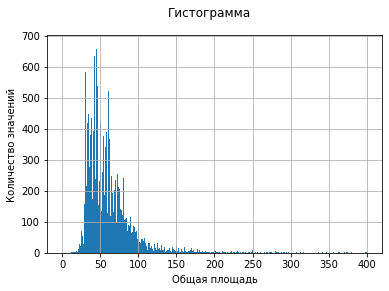

In [74]:
df['total_area'].hist(bins=500, range=(0, 400));
plt.suptitle('Гистограмма')
plt.xlabel('Общая площадь')
plt.ylabel('Количество значений')
plt.show()

Гистограмма общей площади `['total_area']` похожа на нормальное распределение, присутствуют пики значений очевидно характеризующие жилой фонд в России - жилье строится по типовым проектам многие годы.

#### Цена

In [75]:
df['last_price'].describe().round(0)

count        23699.0
mean       6541549.0
std       10887013.0
min          12190.0
25%        3400000.0
50%        4650000.0
75%        6800000.0
max      763000000.0
Name: last_price, dtype: float64

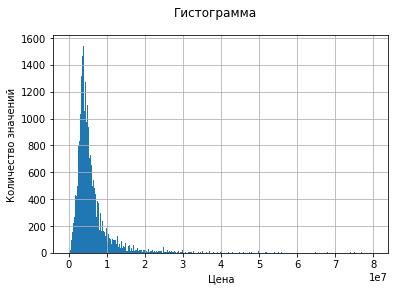

In [76]:
df['last_price'].hist(bins=300, range=(0, 80000000));
plt.suptitle('Гистограмма')
plt.xlabel('Цена')
plt.ylabel('Количество значений')
plt.show()

Гистограмма цены `['last_price']` похожа на нормальное распределение. Значения варируются в широких пределах, есть выбросы в минимальной стоимости жилья.

#### Количество комнат

In [77]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

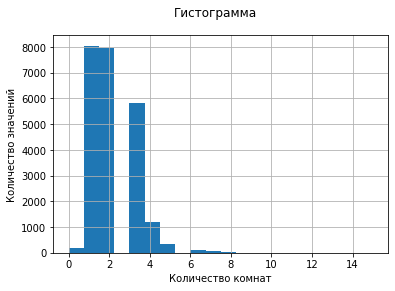

In [78]:
df['rooms'].hist(bins=20, range=(0, 15));
plt.suptitle('Гистограмма')
plt.xlabel('Количество комнат')
plt.ylabel('Количество значений')
plt.show()

Гистограмма количества комнат `['rooms']` похожа на распределение Пуассона. Напомним, что пропущенные значения мы заменили на '0'. В остальном данные точно отражают распределение квартир по количеству комнат.

#### Высота потолков

In [79]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

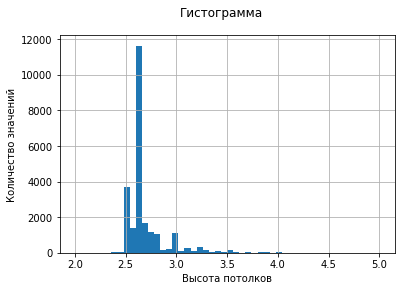

In [80]:
df['ceiling_height'].hist(bins=50, range=(2, 5));
plt.suptitle('Гистограмма')
plt.xlabel('Высота потолков')
plt.ylabel('Количество значений')
plt.show()

Проанализировав гисторамму высоты потлков `['ceiling_height']`, можно отметить что присутствуют выбросы как в минимальных, так и максимальных значениях. Современный СНиП регламентирует ***минимальную высоту потолка в 2,5 метра**, в старом жилом фонде присутствуют варианты 2,48 метра. Поэтому в дальнейшем значения **меньшие 2,48** можно считать выбросами. Максимальное значение высоты потолка ограничим **10 метрами**.

#### Время продажи квартиры

In [81]:
df['days_exposition'].describe()

count    23699.000000
mean       169.360226
std        206.535633
min          1.000000
25%         45.000000
50%         95.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

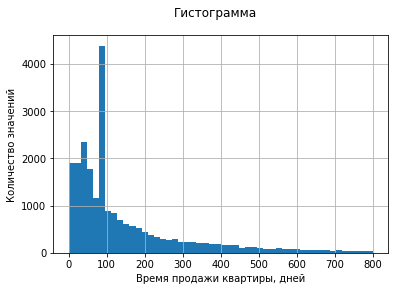

In [82]:
df['days_exposition'].hist(bins=50, range=(0, 800));
plt.suptitle('Гистограмма')
plt.xlabel('Время продажи квартиры, дней')
plt.ylabel('Количество значений')
plt.show()

In [83]:
df['days_exposition'].median()

95.0

In [84]:
df['days_exposition'].mean()

169.36022616988058

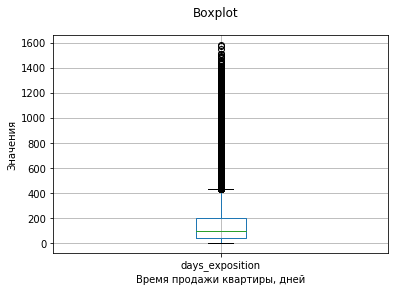

In [85]:
df.boxplot('days_exposition');
plt.suptitle('Boxplot')
plt.xlabel('Время продажи квартиры, дней')
plt.ylabel('Значения')
plt.show()

Анализируя гистограмму дней публикации объявления `['days_exposition']`, стоит отметить на графике, что ранее замененные пропущенные значения очень сильно повлияли на график распределения. В дальнейшем необходимо это исправить и удалить значения равные `[days_exposition_median]`.  

Также мы можем отметить, что продажу до 45 дней можно назвать очень быстрой (первый квартиль), а продажу более 199 дней (третий квартиль) очень долгой.

## Удаление редких и выбивающихся значений

Вызовем функцию `describe()` для всего DataFrame:

In [86]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,ratio_living,square_meter,exposition_weekday,exposition_month,exposition_year,ratio_living_area,ratio_kitchen_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.635090,34.331885,5.892358,10.466719,0.591080,...,367.404110,398.916495,169.360226,0.519416,1.876796e+05,2.569307,6.400101,2017.367146,0.561124,0.186978
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.616396,22.148001,4.885249,5.772207,0.959298,...,293.096867,279.502533,206.535633,0.183759,1.812709e+05,1.789082,3.491561,1.039771,0.101798,0.072460
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,3.809400e+02,0.000000,1.000000,2014.000000,0.021583,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.900000,2.000000,7.000000,0.000000,...,0.000000,87.500000,45.000000,0.467316,1.275862e+05,1.000000,3.000000,2017.000000,0.500000,0.135623
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,498.000000,520.210000,95.000000,0.557080,1.691489e+05,3.000000,6.000000,2017.000000,0.557080,0.173432
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.000000,8.000000,12.000000,1.000000,...,498.000000,520.210000,199.000000,0.631579,2.218750e+05,4.000000,10.000000,2018.000000,0.631579,0.230556
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,1344.000000,1580.000000,1.000000,2.166333e+07,6.000000,12.000000,2019.000000,1.000000,0.787879


При анализе можем увидеть выбросы в следующих столбцах первоначальных данных: last_price, rooms, ceiling_height, floors_total, living_area, kitchen_area, days_exposition.

### Создадим новый DataFrame - good_df и удалим все редкие и выбивающиеся значения.

In [87]:
good_df = df

#### Очистка last_price

In [88]:
good_df = good_df.query('last_price > 500000')
len(good_df)

23681

#### Очистка floors_total

In [89]:
good_df = good_df.query('floors_total != 0')
len(good_df)

23595

#### Очистка rooms

In [90]:
good_df = good_df.query('rooms != 0')
len(good_df)

23401

#### Очистка ceiling_height

Примем, что высота потолков менее 2.48 метра и более 10 метров - выбросы. 

In [91]:
good_df = good_df.query('ceiling_height >= 2.48 and ceiling_height <=10')
len(good_df)

23313

#### Очистка living_area

In [92]:
good_df = good_df.query('living_area >= 12')
len(good_df)

23169

#### Очитска kitchen_area

Согласно СП 54.13330.2016, минимальная площадь кухни составляет 5 м2. Примем, что для кухонь менее 5 м2, значение указано не верно.

In [93]:
good_df = good_df.query('kitchen_area >= 5')
len(good_df)

23058

#### Очистка days_exposition

Как уже отмечал ранее, значения равные [days_exposition_median] необходимо удалить, т.к. они серьезно повлияли на распределение в этом столбце.

In [94]:
good_df = good_df.query('days_exposition != @days_exposition_median')
len(good_df)

19882

In [95]:
len(df) - len(good_df) #вычислим кол-во удаленных строк

3817

По разным причинам из исходной таблицы мы удалили 3817 строк. Наибольшее количество пришлось на столбец `['days_exposition']`, вероятней всего это можно объяснить не верной выгрузкой данных из источников.

## Изучение зависимости данных

Построим матрицу корреляции для выявления зависимостей между столбцами:

In [96]:
good_df.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,ratio_living,square_meter,exposition_weekday,exposition_month,exposition_year,ratio_living_area,ratio_kitchen_area
total_images,1.000000,0.094675,0.103994,0.084063,0.045472,0.008023,0.094359,0.029416,0.017760,NaN,...,0.043582,0.038999,-0.028389,0.071285,0.107050,-0.006666,0.021716,0.118125,0.011850,-0.030555
last_price,0.094675,1.000000,0.642816,0.355480,0.257960,-0.003487,0.573098,0.027559,0.024671,NaN,...,0.116588,0.082611,0.080173,-0.001478,0.625415,0.004339,0.005586,-0.059992,0.007906,-0.103297
total_area,0.103994,0.642816,1.000000,0.760960,0.371483,-0.064837,0.942954,-0.021608,0.034053,NaN,...,0.103531,0.071817,0.148582,0.065131,0.226389,-0.004472,0.006208,-0.112194,0.147462,-0.345130
rooms,0.084063,0.355480,0.760960,1.000000,0.228762,-0.218106,0.836260,-0.150075,0.002640,NaN,...,0.063474,0.061878,0.124834,0.268905,-0.103640,-0.005220,0.003558,-0.094888,0.502779,-0.605285
ceiling_height,0.045472,0.257960,0.371483,0.228762,1.000000,-0.073459,0.355775,-0.040321,0.067343,NaN,...,0.066692,0.043926,0.108255,0.006899,0.225459,-0.017648,-0.004176,-0.071694,-0.003071,-0.011103
floors_total,0.008023,-0.003487,-0.064837,-0.218106,-0.073459,1.000000,-0.155082,0.677815,-0.020029,NaN,...,0.119971,0.121843,-0.050782,-0.213671,0.236584,0.015781,0.008128,0.031012,-0.370482,0.344538
living_area,0.094359,0.573098,0.942954,0.836260,0.355775,-0.155082,1.000000,-0.090573,0.034221,NaN,...,0.083033,0.072923,0.145443,0.244749,0.059699,-0.006224,0.001576,-0.110662,0.418055,-0.489865
floor,0.029416,0.027559,-0.021608,-0.150075,-0.040321,0.677815,-0.090573,1.000000,-0.009051,NaN,...,0.083899,0.080212,-0.039170,-0.146599,0.192208,0.013917,0.016941,0.020176,-0.268042,0.243314
is_apartment,0.017760,0.024671,0.034053,0.002640,0.067343,-0.020029,0.034221,-0.009051,1.000000,NaN,...,-0.005413,0.008506,0.019676,-0.006244,0.023068,-0.008834,0.004597,0.004753,0.002586,0.002010
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Предварительно по матрице распределения можно выделить следующие переменные влияющие на стоимость жилья:
    - общая площадь,
    - количество комнат,
    - высота потолков,
    - жилая площадь,
    - площадь кухни.

Все эти зависимости имеют линейный характер, наиболее вероятно, что в данных есть и другие зависимости, которые нельзя отобразить коэффициентом корреляции Пирсона.

Также хотелось бы выделить зависимости стоимости квадратного метра от значений:
- общей площади,
- высоты потолков,
- количество этажей в доме,
- этажа,
- площади кухни,
- растояния до аэропорта,
- от количества парков и расстояния до них,
- от количества водоемов и расстояния до них.

Данный зависимости наиболее полно отражают запросы потребителей к выбору жилья.

#### Изучение, зависимости цены от площади, числа комнат, удалённости от центра.

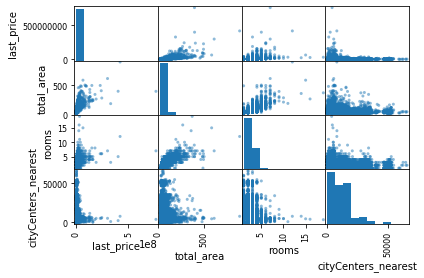

In [97]:
good_df_research1 = good_df.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest', 'floor_type']]
pd.plotting.scatter_matrix(good_df_research1)
plt.show()

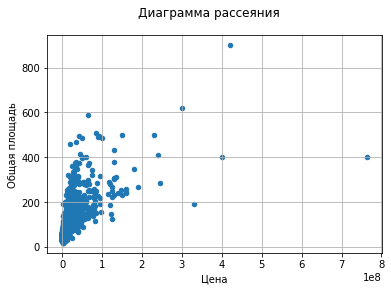

In [98]:
good_df.plot(x='last_price', y='total_area', kind='scatter', grid=True);
plt.suptitle('Диаграмма рассеяния')
plt.xlabel('Цена')
plt.ylabel('Общая площадь')
plt.show()

In [99]:
good_df['last_price'].corr(good_df['total_area'])

0.6428158158331135

Как можно увидеть на диаграмме рассеяния, что чем больше площадь, тем выше стоимость квартиры. Но в данных присутствуют значения с большой площадью и невысокой ценой.

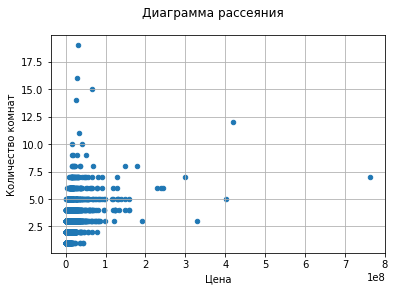

In [100]:
good_df.plot(x='last_price', y='rooms', kind='scatter', grid=True);
plt.suptitle('Диаграмма рассеяния')
plt.xlabel('Цена')
plt.ylabel('Количество комнат')
plt.show()

In [101]:
good_df['last_price'].corr(good_df['rooms'])

0.35547997512253254

В результат построения графика видна зависимость увеличения стоимости жилья, при увеличении количества комнат. Но есть значения выбивающиеся из этого распределения - с большим количеством комнат и низкой ценой.

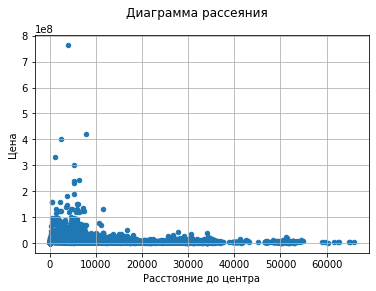

In [102]:
good_df.plot(x='cityCenters_nearest', y='last_price', kind='scatter', grid=True);
plt.suptitle('Диаграмма рассеяния')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
plt.show()

In [103]:
good_df['last_price'].corr(good_df['cityCenters_nearest'])

-0.05181609300832449

При анализе цены и близости квартиры к центру, заметна некоторая связь этих показателей. Чем ближе к центру, тем цена выше. Вероятно четкой зависимости нет, т.к. необходимо выполнять анализ отдельно по каждому населенному пункту.

In [104]:
good_df_rooms = good_df.groupby('floor_type')['last_price'].agg(['median', 'min', 'max']).sort_values(by='median', ascending=False)
good_df_rooms

,median,min,max
floor_type,,,
другой,4750000.0,530000.0,330000000.0
последний,4300000.0,560000.0,763000000.0
первый,3850000.0,520000.0,55900000.0


Сгруппировав данные по обозначению этажа, хотелось бы отметить, что в среднем **самые дешевые квартиры находятся на первых этажах**.   
**Самая дорогая** недвижимость из наших данных расположена на **последнем этаже**.

In [105]:
good_df.pivot_table(index='exposition_weekday', values='last_price', aggfunc = {'count', 'median', 'max'})

,count,max,median
exposition_weekday,,,
0,2950,300000000.0,4550000.0
1,3500,159000000.0,4662500.0
2,3310,420000000.0,4600000.0
3,3656,159984000.0,4600000.0
4,3420,190870000.0,4500000.0
5,1621,763000000.0,4500000.0
6,1425,130000000.0,4500000.0


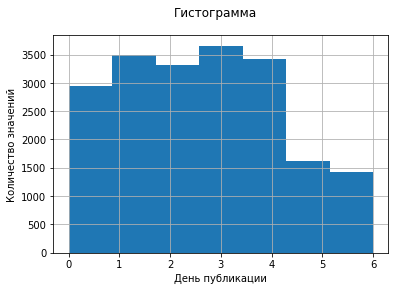

In [106]:
good_df['exposition_weekday'].hist(bins=7);
plt.suptitle('Гистограмма')
plt.xlabel('День публикации')
plt.ylabel('Количество значений')
plt.show()

Анализируя день недели подачи объявления, можно заметить, что чаще всего объявлению **публикуются в будни**.

In [107]:
good_df.groupby('exposition_month')['last_price'].agg(['count', 'median'])

,count,median
exposition_month,,
1,1251,4575000.0
2,2222,4592500.0
3,1916,4500000.0
4,1477,4600000.0
5,1114,4550000.0
6,1642,4400000.0
7,1518,4600000.0
8,1554,4550000.0
9,1794,4700000.0


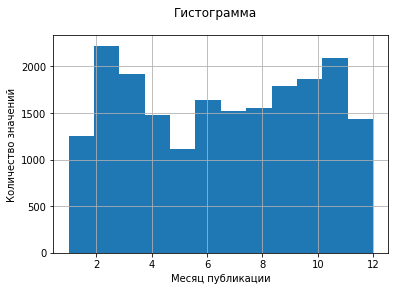

In [108]:
good_df['exposition_month'].hist(bins=12);
plt.suptitle('Гистограмма')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество значений')
plt.show()

Чаще всего публикуют объявления о продаже квартиры в __феврале и ноябре__.

In [109]:
good_df.pivot_table(index='exposition_year', values='last_price', aggfunc = {'count', 'median', 'max'})

,count,max,median
exposition_year,,,
2014,119,79339000.0,7265000.0
2015,1101,180000000.0,5239000.0
2016,2638,401300000.0,4550000.0
2017,7664,763000000.0,4500000.0
2018,7307,330000000.0,4500000.0
2019,1053,95000000.0,4800000.0


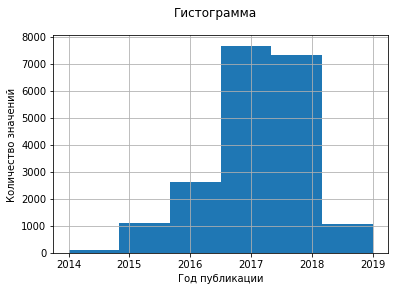

In [110]:
good_df['exposition_year'].hist(bins=6);
plt.suptitle('Гистограмма')
plt.xlabel('Год публикации')
plt.ylabel('Количество значений')
plt.show()

До **2017 года** наблюдался значительный рост подачи объявлений о продаже недвижимости, далее происходит уменьшение количества объявлений. 

## Анализ 10 населённых пунктов с наибольшим числом объявлений

Выберием 10 населённых пунктов с наибольшим числом объявлений.  
Посчитаем среднюю цену квадратного метра в этих населённых пунктах.  
Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.  

In [111]:
# сгруппируем данные
top_10_count_ads = (
    good_df
    .groupby('locality_name').agg({'square_meter':['count', 'mean'], 'last_price':['max', 'min']})
)

In [112]:
# переименуем столбцы
top_10_count_ads.columns = ['count', 'mean', 'max_price', 'min_price']

In [113]:
# отсортируем данные по убыванию count
top_10_count_ads = top_10_count_ads.sort_values(by='count', ascending=False)
top_10_count_ads.head(10)

,count,mean,max_price,min_price
locality_name,,,,
Санкт-Петербург,13267,210064.069605,763000000.0,1200000.0
посёлок Мурино,476,172487.042311,8500000.0,1730000.0
посёлок Шушары,394,151713.534543,10700000.0,1780000.0
Всеволожск,330,133296.178879,24412900.0,1150000.0
Колпино,304,131736.185592,36900000.0,2100000.0
Пушкин,300,191269.998500,42000000.0,1990000.0
посёлок Парголово,287,194695.304983,9140000.0,1800000.0
деревня Кудрово,279,188138.795448,13000000.0,2100000.0
Гатчина,263,121347.379316,12700000.0,850000.0


In [114]:
top_10_count_ads = top_10_count_ads.head(10)

Самая высокая стоимость квадратного метра недвижимости, количество объявлений и самая высокая цена на квартиру в **Санкт-Петербурге**.  

Меньше всего объявлений, самая низкая цена за м.кв. и объявление с самой дешевой квартирой в **Выборге**.

## Анализ квартир в Санкт-Петербурге

Создадим новый DataFrame, только для Санкт-Петербурга:

In [115]:
sp_ads = good_df.query('locality_name == "Санкт-Петербург"').reset_index()

Создадим столбец `['cityCenters_km']` с расстоянием до центра в километрах и округлим до целых значений:

In [116]:
sp_ads['cityCenters_km'] = (sp_ads['cityCenters_nearest'] / 1000).astype('int')
sp_ads.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ratio_living,total_interval,square_meter,exposition_weekday,exposition_month,exposition_year,floor_type,ratio_living_area,ratio_kitchen_area,cityCenters_km
0,2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.30,4,...,0.612500,"(52.0, 60.0]",151486.88,3,8,2015,другой,0.612500,0.148214,13
1,3,0,64900000.0,159.0,2015-07-24,3,2.65,14,82.59,9,...,0.000000,"(87.0, 900.0]",785809.42,4,7,2015,другой,0.519434,0.116730,6
2,4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.00,13,...,0.320000,"(87.0, 900.0]",312500.00,1,6,2018,другой,0.320000,0.410000,8
3,9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.60,7,...,0.714754,"(60.0, 69.9]",123853.21,6,2,2017,другой,0.714754,0.106557,15
4,10,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.30,3,...,0.512626,"(34.0, 40.0]",248768.47,3,11,2017,другой,0.512626,0.214646,13


Сгруппируем данные и посчитаем среднюю цену для каждого километра:

In [117]:
centr_km = sp_ads.pivot_table(index='cityCenters_km', values='last_price', aggfunc=('mean')).round(0)
centr_km

,last_price
cityCenters_km,
0,22531024.0
1,17223391.0
2,15958000.0
3,13638451.0
4,12903666.0
5,15296332.0
6,12911322.0
7,13139237.0
8,7934552.0


Построим график зависимости цены от удалённости от центра Санкт-Петербурга:

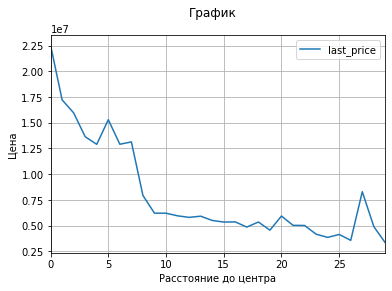

In [118]:
centr_km.plot(grid=True, legend=True);
plt.suptitle('График')
plt.xlabel('Расстояние до центра')
plt.ylabel('Цена')
plt.show()

Анализируя график можно заметить, что на отметке в 4 км наблюдаем его сильное изменение. Таким образом 4-ых километровая зона и входит в центр Санкт-Петербурга.

## Анализ центра Санкт-Петербурга

Сделаем срез данных по таблице и выведем значения входящие в центральную зону Санкт-Петербурга:

In [119]:
sp_ads_center = sp_ads.query('cityCenters_km <= 4').copy()
sp_ads_center

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ratio_living,total_interval,square_meter,exposition_weekday,exposition_month,exposition_year,floor_type,ratio_living_area,ratio_kitchen_area,cityCenters_km
12,24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,...,0.478395,"(87.0, 900.0]",139784.95,5,10,2015,первый,0.478395,0.201646,2
20,35,6,15500000.0,149.0,2017-06-26,5,2.65,5,104.0,4,...,0.697987,"(87.0, 900.0]",149038.46,0,6,2017,другой,0.697987,0.114094,3
32,61,18,7990000.0,74.0,2017-08-24,2,2.65,4,43.0,4,...,0.581081,"(69.9, 87.0]",185813.95,3,8,2017,последний,0.581081,0.270270,4
33,63,2,20000000.0,118.0,2018-09-11,3,3.00,9,68.0,7,...,0.576271,"(87.0, 900.0]",294117.65,1,9,2018,другой,0.576271,0.135593,4
46,99,32,9600000.0,90.0,2017-09-26,4,2.65,5,67.0,2,...,0.744444,"(87.0, 900.0]",143283.58,1,9,2017,другой,0.744444,0.088889,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13224,23609,7,7280000.0,64.3,2018-07-20,2,2.65,10,34.6,10,...,0.538103,"(60.0, 69.9]",210404.62,4,7,2018,последний,0.538103,0.177294,4
13242,23644,7,4990000.0,62.5,2018-04-26,2,2.70,4,32.3,4,...,0.516800,"(60.0, 69.9]",154489.16,3,4,2018,последний,0.516800,0.193600,4
13244,23648,14,10100000.0,78.0,2017-05-12,3,3.27,5,48.6,5,...,0.623077,"(69.9, 87.0]",207818.93,4,5,2017,последний,0.623077,0.105128,1
13252,23665,11,4250000.0,47.0,2016-05-20,1,2.65,6,18.2,1,...,0.387234,"(45.0, 52.0]",233516.48,4,5,2016,первый,0.387234,0.310638,4


Добавим в таблицу по Санкт-Петербургу столбец со значением принадлежности к центру города (центр/вне центра).

In [120]:
sp_ads['center_around_4km'] = (
    sp_ads['cityCenters_km']
    .where(sp_ads['cityCenters_km'] > 4, 'Центр')
    .where(sp_ads['cityCenters_km'] <= 4, 'Вне центра')
)

In [121]:
sp_ads.query('cityCenters_km <= 4')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,total_interval,square_meter,exposition_weekday,exposition_month,exposition_year,floor_type,ratio_living_area,ratio_kitchen_area,cityCenters_km,center_around_4km
12,24,8,6500000.0,97.2,2015-10-31,2,2.65,3,46.5,1,...,"(87.0, 900.0]",139784.95,5,10,2015,первый,0.478395,0.201646,2,Центр
20,35,6,15500000.0,149.0,2017-06-26,5,2.65,5,104.0,4,...,"(87.0, 900.0]",149038.46,0,6,2017,другой,0.697987,0.114094,3,Центр
32,61,18,7990000.0,74.0,2017-08-24,2,2.65,4,43.0,4,...,"(69.9, 87.0]",185813.95,3,8,2017,последний,0.581081,0.270270,4,Центр
33,63,2,20000000.0,118.0,2018-09-11,3,3.00,9,68.0,7,...,"(87.0, 900.0]",294117.65,1,9,2018,другой,0.576271,0.135593,4,Центр
46,99,32,9600000.0,90.0,2017-09-26,4,2.65,5,67.0,2,...,"(87.0, 900.0]",143283.58,1,9,2017,другой,0.744444,0.088889,2,Центр
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13224,23609,7,7280000.0,64.3,2018-07-20,2,2.65,10,34.6,10,...,"(60.0, 69.9]",210404.62,4,7,2018,последний,0.538103,0.177294,4,Центр
13242,23644,7,4990000.0,62.5,2018-04-26,2,2.70,4,32.3,4,...,"(60.0, 69.9]",154489.16,3,4,2018,последний,0.516800,0.193600,4,Центр
13244,23648,14,10100000.0,78.0,2017-05-12,3,3.27,5,48.6,5,...,"(69.9, 87.0]",207818.93,4,5,2017,последний,0.623077,0.105128,1,Центр
13252,23665,11,4250000.0,47.0,2016-05-20,1,2.65,6,18.2,1,...,"(45.0, 52.0]",233516.48,4,5,2016,первый,0.387234,0.310638,4,Центр


#### Сравним площади квартир

Запустим цикл построения графиков по сгруппированным данным:

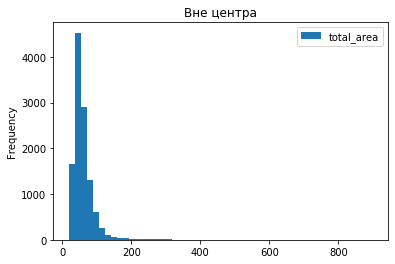

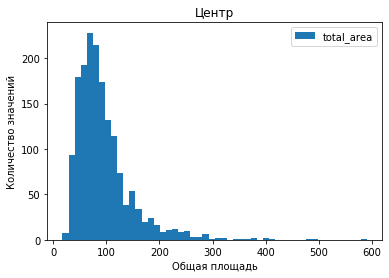

In [122]:
for name, group_data in sp_ads.groupby('center_around_4km'):
    group_data.plot(y='total_area', title=name, kind='hist', bins=50)
plt.xlabel('Общая площадь')
plt.ylabel('Количество значений')
plt.show()

In [123]:
# Для центра Санкт-Петербурга
sp_ads_center['total_area'].describe()

count    1673.000000
mean       94.883192
std        54.613240
min        17.600000
25%        60.440000
50%        82.000000
75%       112.000000
max       590.000000
Name: total_area, dtype: float64

In [124]:
# Для всего города
sp_ads['total_area'].describe()

count    13267.000000
mean        63.374730
std         38.521602
min         17.600000
25%         41.800000
50%         54.000000
75%         72.600000
max        900.000000
Name: total_area, dtype: float64

Как мы видим в центре Санкт-Петербурга увеличилась средняя площадь продаваемых квартир, не удивительно, в центре города всегда идет запрос на простороное жилье. Гистограмма похожа на нормальное распределение.

#### Сравним цены на жилье

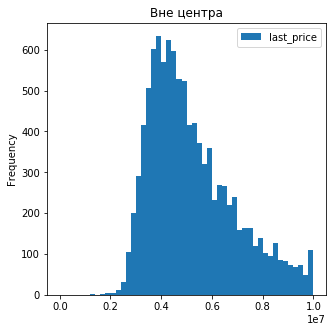

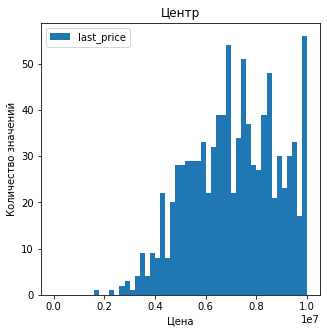

In [125]:
for name, group_data in sp_ads.groupby('center_around_4km'):
    group_data.plot(y='last_price', title=name, kind='hist', bins=50, figsize=(5, 5), range=(0, 10000000))
plt.xlabel('Цена')
plt.ylabel('Количество значений')
plt.show()

In [126]:
# Для центра Санкт-Петербурга
sp_ads_center['last_price'].describe().round(0)

count         1673.0
mean      14436172.0
std       27312925.0
min        1600000.0
25%        6850000.0
50%        9300000.0
75%       13700000.0
max      763000000.0
Name: last_price, dtype: float64

In [127]:
# Для всего города
sp_ads['last_price'].describe().round(0)

count        13267.0
mean       7723921.0
std       13158244.0
min        1200000.0
25%        4150000.0
50%        5350000.0
75%        7769950.0
max      763000000.0
Name: last_price, dtype: float64

Средняя цена на жилье в центре Санкт-Петербурга почти в два раза выше, чем по всему городу в целом. **Ближе к центру - выше стоимость**.

#### Сравним количество комнат

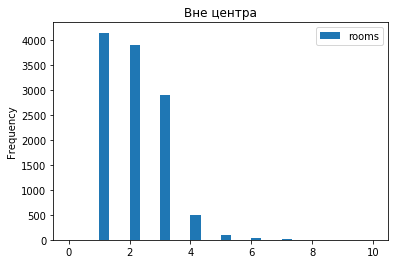

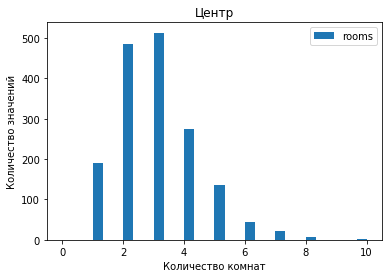

In [128]:
for name, group_data in sp_ads.groupby('center_around_4km'):
    group_data.plot(y='rooms', title=name, kind='hist', bins=30, range=(0, 10))
plt.xlabel('Количество комнат')
plt.ylabel('Количество значений')
plt.show()

In [129]:
# Для центра Санкт-Петербурга
sp_ads_center['rooms'].describe()

count    1673.000000
mean        2.994023
std         1.483147
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        19.000000
Name: rooms, dtype: float64

In [130]:
# Для центра Санкт-Петербурга
sp_ads_center['rooms'].value_counts(abs)

3     0.306635
2     0.289301
4     0.163778
1     0.113568
5     0.080693
6     0.025702
7     0.013150
8     0.003586
10    0.001195
19    0.000598
16    0.000598
15    0.000598
11    0.000598
Name: rooms, dtype: float64

In [131]:
# Для всего города
sp_ads['rooms'].describe()

count    13267.000000
mean         2.145398
std          1.107807
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [132]:
# Для всего города
p = sp_ads['rooms'].value_counts(abs)

In [133]:
p.sum()

0.9999999999999999

Заметим тенденцию, в центре города в основном квартиры двух- и трехкомнатные, а в целом по городу одно- и двухкомнатные. Количество однокомнатных квартир в центре ~11%, а в остальной части города ~32%. 

#### Сравним высоту потолков

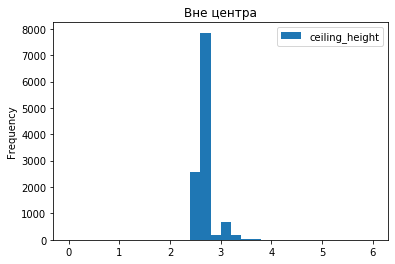

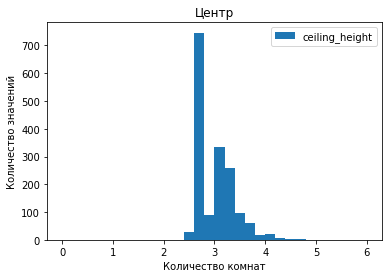

In [134]:
for name, group_data in sp_ads.groupby('center_around_4km'):
    group_data.plot(y='ceiling_height', title=name, kind='hist', bins=30, range=(0, 6))
plt.xlabel('Количество комнат')
plt.ylabel('Количество значений')
plt.show()

In [135]:
# Для центра Санкт-Петербурга
sp_ads_center['ceiling_height'].describe()

count    1673.000000
mean        2.977525
std         0.376821
min         2.500000
25%         2.650000
50%         2.900000
75%         3.200000
max         5.300000
Name: ceiling_height, dtype: float64

In [136]:
# Для всего города
sp_ads['ceiling_height'].describe()

count    13267.000000
mean         2.716300
std          0.245713
min          2.480000
25%          2.600000
50%          2.650000
75%          2.730000
max          8.300000
Name: ceiling_height, dtype: float64

Высота потолков в центре города выше, а доля потолков выше трех метров составляет порядка 50%. Веротяней всего это старый жилой фонд начала 20 века, характеризующийся более высокими стандаратми к комфорту квартир.

#### Выделим факторы, которые влияют на стоимость квартиры в Санкт-Петербурге

In [137]:
sp_ads_center.corr()

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,ratio_living,square_meter,exposition_weekday,exposition_month,exposition_year,ratio_living_area,ratio_kitchen_area,cityCenters_km
index,1.000000,-0.007823,-0.022673,-0.031781,-0.024037,-0.054434,0.031223,-0.042652,-0.014596,-0.031922,...,-0.048739,-0.004495,-0.060841,-0.025768,-0.010667,-0.012315,0.033073,-0.045955,0.010767,0.044592
total_images,-0.007823,1.000000,0.138509,0.097995,0.035695,0.098274,-0.028090,0.075828,-0.010921,-0.009916,...,0.028028,-0.043212,0.027626,0.159213,0.027551,-0.006188,0.155350,-0.025186,0.044442,-0.029915
last_price,-0.022673,0.138509,1.000000,0.536393,0.268831,0.083033,0.060110,0.471809,0.136024,0.013576,...,-0.031505,0.042752,-0.005408,0.749651,0.042433,-0.009568,-0.038414,0.001721,-0.104068,-0.078488
total_area,-0.031781,0.097995,0.536393,1.000000,0.757069,0.201911,0.033264,0.938279,0.143422,-0.013357,...,-0.010533,0.123473,0.076338,0.191587,0.009444,-0.039178,-0.083240,0.158862,-0.355575,-0.059533
rooms,-0.024037,0.035695,0.268831,0.757069,1.000000,0.156140,-0.130464,0.816658,-0.014571,-0.011408,...,-0.003424,0.134732,0.256502,-0.106159,-0.014966,-0.047320,-0.071386,0.418590,-0.476173,-0.084120
ceiling_height,-0.054434,0.098274,0.083033,0.201911,0.156140,1.000000,-0.203135,0.221413,-0.121466,0.019086,...,-0.043910,0.075590,0.086453,0.019193,-0.053133,-0.010616,0.026625,0.112713,-0.072300,-0.110944
floors_total,0.031223,-0.028090,0.060110,0.033264,-0.130464,-0.203135,1.000000,-0.073883,0.661711,-0.010230,...,0.090969,0.016463,-0.245852,0.203029,0.013346,0.017660,-0.024928,-0.315244,0.113585,0.347679
living_area,-0.042652,0.075828,0.471809,0.938279,0.816658,0.221413,-0.073883,1.000000,0.044173,-0.003929,...,-0.007696,0.126687,0.281763,0.043378,0.003259,-0.036923,-0.092529,0.434985,-0.462587,-0.099932
floor,-0.014596,-0.010921,0.136024,0.143422,-0.014571,-0.121466,0.661711,0.044173,1.000000,-0.005243,...,0.040308,0.030712,-0.157165,0.197827,0.042681,0.022265,-0.052609,-0.206600,0.017328,0.230451
is_apartment,-0.031922,-0.009916,0.013576,-0.013357,-0.011408,0.019086,-0.010230,-0.003929,-0.005243,1.000000,...,-0.011440,0.048002,0.012499,0.041655,-0.075591,0.015017,-0.014343,0.038903,0.016890,-0.054593


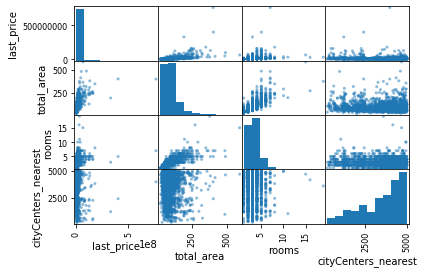

In [138]:
sp_ads_center_research = sp_ads_center.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(sp_ads_center_research)
plt.show()

In [139]:
# Матрица корреляции для центра Санкт-Петербурга 
sp_ads_center_research.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.536393,0.268831,-0.075239
total_area,0.536393,1.000000,0.757069,-0.054148
rooms,0.268831,0.757069,1.000000,-0.081076
cityCenters_nearest,-0.075239,-0.054148,-0.081076,1.000000


In [140]:
# Матрица корреляции для всего Санкт-Петербурга 
sp_ads_research = sp_ads.loc[:, ['last_price', 'total_area', 'rooms', 'cityCenters_nearest']]
sp_ads_research.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.649255,0.365193,-0.242797
total_area,0.649255,1.000000,0.761095,-0.335797
rooms,0.365193,0.761095,1.000000,-0.294481
cityCenters_nearest,-0.242797,-0.335797,-0.294481,1.000000


Как мы можем заметить по матрицам корреляции зависимость в таблице `sp_ads_center_research` от расстояния до центра практически стало нулевым, следовательно мы верно выбрали область центра Санкт-Петербурга.  

Параметры размера общей площади и количество комнат стал чуть меньше влиять на стоимость для центра Санкт-Петербурга.  



In [141]:
sp_ads_center_rooms = sp_ads_center.groupby('floor_type')['last_price'].agg(['median', 'min', 'max']).sort_values(by='median', ascending=False)
sp_ads_center_rooms

,median,min,max
floor_type,,,
другой,9900000.0,2200000.0,330000000.0
последний,9000000.0,3599000.0,763000000.0
первый,6800000.0,1600000.0,49900000.0


Как и для первоначального DataFrame, в центре самые дешевые квартиры находятся на первых этажах. Никто не любит, чтобы ему заглядывали в окна.

In [142]:
sp_ads_center.pivot_table(index='exposition_weekday', values='last_price', aggfunc = {'count', 'median', 'max'})

,count,max,median
exposition_weekday,,,
0,256,160000000.0,9325000.0
1,292,159000000.0,9625000.0
2,274,330000000.0,9375000.0
3,371,159984000.0,9450000.0
4,266,140000000.0,8850000.0
5,112,763000000.0,8500000.0
6,102,130000000.0,9700000.0


Количество объявлений с понедельника по пятницу, больше, чем для выходных. Это соответствует полученным ранее выводам.  

В среднем стоимость квартир выставленных в пт и субботу ниже, чем в дргуие дни.

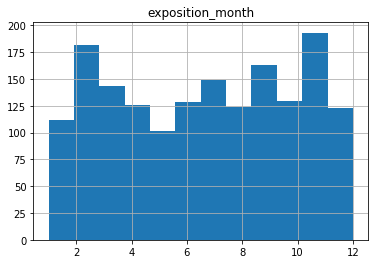

In [143]:
sp_ads_center.hist('exposition_month', bins=12);

В среднем цены выше в сентябре и феврале, а чаще всего в центре публикуют объявления о продаже квартиры в феврале и ноябре. 

In [144]:
sp_ads_center.pivot_table(index='exposition_year', values='last_price', aggfunc = {'count', 'median', 'max'})

,count,max,median
exposition_year,,,
2014,17,79339000.0,19800000.0
2015,176,180000000.0,9990000.0
2016,261,401300000.0,9500000.0
2017,672,763000000.0,9000000.0
2018,484,330000000.0,9235000.0
2019,63,95000000.0,8840000.0


В центре наблюдается аналогичное уменьшение количества объявлений с 2017 года, а также уменьшение средней стоимости квартир выставленных на продажу.

### Шаг 5. Общий вывод

#### Предобработка данных
Подводя итог, хотелось бы в первую очередь обратить внимание на то, что в таблице пропущенно достаточно большое количество значений. Требуется выяснить причины возникновения пропусков и по возможности дополнить таблицу реальными значениями. Это в целом благоприятно повлияет на проведение анализа данных.

Основные методы и способы использованные при заполнении пропусков:
- медиана,
- медианой для групп данных,
- нулевым значением,
- булев типом.

В пердобработке данных были выявлены ошибочные форматы переменных, они были изменены для дальнейшей работы с ними: first_day_exposition, floors_total, balcony, parks_around3000, ponds_around3000, days_exposition.

#### Добавлены новые столбцы
Для более точного анализа были добавлены и вычислены следующие значения стоимость квадратного метра `['square_meter']`, соотношение жилой и общей площади `[ratio_living_area]`, отношение площади кухни к общей `[ratio_kitchen_area]`.

Методом `to_datetime` к столбцу `['first_day_exposition']` вычеслили временные значения день недели, месяц, год публикации объявления и дополнили таблицу.

Присвоили этажам следующие значения и создали столбец `[floor_type]`, варианты — первый, последний, другой.

#### Результаты анализа данных

***Основные факторы*** влияющие на стоимость жилья:
    - общая площадь,
    - количество комнат,
    - высота потолков,
    - жилая площадь,
    - площадь кухни.
    - удаленность от центра.

Выявлены выбросы в столбцах: *last_price, rooms, ceiling_height, floors_total, living_area, kitchen_area, days_exposition*.

Основные характеристики объявлений:
1. В основном продаются квартиры до ***100 м2***
2. Основная стоимость квартир варируется в пределах до ***10 млн. руб***
3. В среднем высота потолков состовляет ***2,7 м***
4. Продажу до ***45 дней*** можно назвать очень быстрой, а продажу более ***199 дней*** очень долгой
5. Чаще всего объявлению публикуются в ***будни***
6. Чаще всего публикуют объявления о продаже квартиры в ***феврале и ноябре***
7. До ***2017 года*** наблюдался значительный ***рост*** подачи объявлений о продаже недвижимости, далее происходит уменьшение количества объявлений


***Топ-10 городов*** с наибольшим количеством объявлений: Санкт-Петербург, посёлок Мурино, посёлок Шушары, Всеволожск, Колпино, Пушкин, посёлок Парголово, деревня Кудрово, Гатчина, Выборг.  

Самая высокая стоимость квадратного метра недвижимости, количество объявлений и самая высокая цена на квартиры в ***Санкт-Петербурге***. Меньше всего объявлений, самая низкая цена за м.кв. и объявление с самой дешевой квартирой в ***Выборге***.


Анализируя объявления в Санкт-Петербурге была выделена зона ***центра города равная 4 км***.  

Проведя анализ данных по **центру Санкт-Петербурга** были сделаны следующие выводы:  

1. В центре Санкт-Петербурга увеличивается средняя площадь продаваемых квартир  
2. Средняя цена на жилье в центре Санкт-Петербурга почти в два раза выше, чем по всему городу в целом 
3. В центре города в основном квартиры двух- и трехкомнатные, а в целом по городу одно- и двухкомнатные  
4. Количество однокомнатных квартир в центре ~11%, а в остальной части города ~32%
5. Высота потолков в центре города выше, а доля потолков выше трех метров составляет порядка 50%
6. В центре Санкт-Петербурга размер общей площади и количество комнат чуть меньше влиять на стоимость
7. В центре самые дешевые квартиры находятся на первых этажах, также как и для других объявлений
8. Количество объявлений в будни, больше, чем для выходных
9. В среднем стоимость квартир выставленных в пт и субботу ниже, чем в дргуие дни
10. В среднем цены выше в сентябре и феврале
11. Чаще всего в центре публикуют объявления о продаже квартир в феврале и ноябре, также как и для других объявлений
12. В центре наблюдается уменьшение количества объявлений с 2017 года, а также уменьшение средней стоимости квартир выставленных на продажу, также как и для других объявлений  


**Рекомендации для ресурсов публикации объявлений:**
1. Минимизировать количество пропущенных значений, путем требования заполнения всех метрик объявлений, для уменьшения возможных мошеннеческих действий.
2. Актуализировать список населенных пунктов.
3. Валидация заполненных форм объявления перед публикацией(например, сравнение значений поданного объявления по адресу дома с базой данных имеющихся объявлений).